# DESAFIO CIENTISTA DE DADOS

##Desafio

> Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido.

> Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).


In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Acessando DataFrame
df = pd.read_csv("/content/desafio_indicium_imdb.csv")

In [3]:
# Verificando DataFrame
df.head(2)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


#### **TRATAMENTO DOS DADOS**

In [4]:
# Remover a coluna Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# Exibir as primeiras linhas para verificar a remoção
df.head(1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [6]:
# Verificando o tamanho do dataframe
df.shape

(999, 15)

In [7]:
# Verificar tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


In [8]:
# Renomeando Colunas
df = df.rename(columns={
    'Series_Title': 'Título',
    'Released_Year': 'Ano_de_Lançamento',
    'Certificate': 'Classificação',
    'Runtime': 'Duração',
    'Genre': 'Gênero',
    'IMDB_Rating': 'Avaliação_IMDB',
    'Overview': 'Sinopse',
    'Meta_score': 'Meta_score',
    'Director': 'Diretor',
    'Star1': 'Estrela_1',
    'Star2': 'Estrela_2',
    'Star3': 'Estrela_3',
    'Star4': 'Estrela_4',
    'No_of_Votes': 'Número_de_Votos',
    'Gross': 'Arrecadação'})

In [9]:
# Checagem da transformação
df.head(1)

,Título,Ano_de_Lançamento,Classificação,Duração,Gênero,Avaliação_IMDB,Sinopse,Meta_score,Diretor,Estrela_1,Estrela_2,Estrela_3,Estrela_4,Número_de_Votos,Arrecadação
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [10]:
# Verificando valores nulos
df.isnull().sum()

Título                 0
Ano_de_Lançamento      0
Classificação        101
Duração                0
Gênero                 0
Avaliação_IMDB         0
Sinopse                0
Meta_score           157
Diretor                0
Estrela_1              0
Estrela_2              0
Estrela_3              0
Estrela_4              0
Número_de_Votos        0
Arrecadação          169
dtype: int64

In [11]:
# Colocando filtro nos dados nulos
df[df.isnull().any(axis=1)]

,Título,Ano_de_Lançamento,Classificação,Duração,Gênero,Avaliação_IMDB,Sinopse,Meta_score,Diretor,Estrela_1,Estrela_2,Estrela_3,Estrela_4,Número_de_Votos,Arrecadação
17,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
19,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
29,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
31,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
45,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
994,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [12]:
# Removendo linhas com valores nulos
df = df.dropna()
# Reiniciar o índice
df = df.reset_index(drop=True)

In [13]:
# checagem da eliminação dos dados nulos
df.isna().sum()

Título               0
Ano_de_Lançamento    0
Classificação        0
Duração              0
Gênero               0
Avaliação_IMDB       0
Sinopse              0
Meta_score           0
Diretor              0
Estrela_1            0
Estrela_2            0
Estrela_3            0
Estrela_4            0
Número_de_Votos      0
Arrecadação          0
dtype: int64

In [14]:
# Verificando se os dados são unicos na coluna
df.Título.is_unique

True

In [15]:
# Verificando o tamanho do dataframe
df.shape

(713, 15)

In [16]:
# Verificação dos tipos de dados
df.dtypes

Título                object
Ano_de_Lançamento     object
Classificação         object
Duração               object
Gênero                object
Avaliação_IMDB       float64
Sinopse               object
Meta_score           float64
Diretor               object
Estrela_1             object
Estrela_2             object
Estrela_3             object
Estrela_4             object
Número_de_Votos        int64
Arrecadação           object
dtype: object

In [17]:
# Iterando sobre as colunas do DataFrame
for column in df.columns:
    # Verificando se a coluna contém valores inteiros
    if df[column].dtype == 'int':
        print(f"Valores inteiros únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)  # Linha de separação

    # Verificando se a coluna contém valores de ponto flutuante
    elif df[column].dtype == 'float':
        print(f"Valores decimais únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)  # Linha de separação

    # Verificando se a coluna contém valores de texto (string)
    elif df[column].dtype == 'object':
        print(f"Valores de texto únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)  # Linha de separação

Valores de texto únicos na coluna 'Título':
['(500) Days of Summer', '12 Angry Men', '12 Years a Slave', '1917', '2001: A Space Odyssey', '21 Grams', '25th Hour', '28 Days Later...', '3 Idiots', '300', '3:10 to Yuma', '50/50', 'A Beautiful Mind', 'A Bronx Tale', 'A Christmas Story', 'A Clockwork Orange', 'A Few Good Men', "A Hard Day's Night", 'A Little Princess', 'A Man for All Seasons', 'A Star Is Born', 'A Streetcar Named Desire', 'About Time', 'Ace in the Hole', 'Adams æbler', 'Adaptation.', 'After Hours', 'Ah-ga-ssi', 'Airplane!', 'Aladdin', 'Alien', 'Aliens', 'All About Eve', 'All Quiet on the Western Front', 'All That Jazz', "All the President's Men", 'Almost Famous', 'Amadeus', 'American Beauty', 'American Gangster', 'American History X', 'American Psycho', 'Amores perros', 'Amour', 'Amélie', 'Annie Hall', 'Apocalypse Now', 'Apocalypto', 'Apollo 13', 'Argo', 'Arrival', 'As Good as It Gets', 'Atonement', 'Au revoir les enfants', 'Avatar', 'Avengers: Endgame', 'Avengers: Infinity

In [18]:
# Convertendo a coluna 'Ano_de_Lançamento' para numérica, ignorando erros
df['Ano_de_Lançamento'] = pd.to_numeric(df['Ano_de_Lançamento'], errors='coerce')

# Removendo linhas onde 'Ano_de_Lançamento' é NaN (devido aos valores 'PG')
df_clean = df.dropna(subset=['Ano_de_Lançamento'])

In [19]:
# checagem dos valores nulos
df.isna().sum()

Título               0
Ano_de_Lançamento    1
Classificação        0
Duração              0
Gênero               0
Avaliação_IMDB       0
Sinopse              0
Meta_score           0
Diretor              0
Estrela_1            0
Estrela_2            0
Estrela_3            0
Estrela_4            0
Número_de_Votos      0
Arrecadação          0
dtype: int64

In [20]:
# Removendo linhas com valores nulos
df = df.dropna()

In [21]:
# Convertendo Ano_de_Lançamento para INT
df['Ano_de_Lançamento'] = df['Ano_de_Lançamento'].astype(int)

In [22]:
# Verificação dos tipos de dados
df.dtypes

Título                object
Ano_de_Lançamento      int64
Classificação         object
Duração               object
Gênero                object
Avaliação_IMDB       float64
Sinopse               object
Meta_score           float64
Diretor               object
Estrela_1             object
Estrela_2             object
Estrela_3             object
Estrela_4             object
Número_de_Votos        int64
Arrecadação           object
dtype: object

In [23]:
# Convertendo Arrecadação para INT
def converter_arrecadacao(valor_str):
    valor_str_sem_virgula = valor_str.replace(',', '')
    return float(valor_str_sem_virgula)

# Aplicar a função na coluna 'Arrecadação' e substituir os valores no DataFrame
df['Arrecadação'] = df['Arrecadação'].apply(converter_arrecadacao).astype(int)

In [93]:
# Verificação dos tipos de dados
df.dtypes

Título                object
Ano_de_Lançamento      int64
Classificação         object
Duração               object
Gênero                object
Avaliação_IMDB       float64
Sinopse               object
Meta_score           float64
Diretor               object
Estrela_1             object
Estrela_2             object
Estrela_3             object
Estrela_4             object
Número_de_Votos        int64
Arrecadação            int64
dtype: object

In [24]:
# Convertendo duração para INT
def converter_duracao_para_minutos(duracao):
    # Verifica se o último caractere é 'min'
    if duracao.endswith('min'):
        # Extrai o número de minutos e converte para int
        return int(duracao[:-3].strip())
    else:
        return None  # Retorna None se o formato não for válido

# Aplicar a função na coluna 'Duração' e substituir os valores no DataFrame
df['Duração'] = df['Duração'].apply(converter_duracao_para_minutos)

In [25]:
# Verificação dos tipos de dados
df.dtypes

Título                object
Ano_de_Lançamento      int64
Classificação         object
Duração                int64
Gênero                object
Avaliação_IMDB       float64
Sinopse               object
Meta_score           float64
Diretor               object
Estrela_1             object
Estrela_2             object
Estrela_3             object
Estrela_4             object
Número_de_Votos        int64
Arrecadação            int64
dtype: object

In [26]:
# Verificar valores ausentes
df.isnull().sum()

Título               0
Ano_de_Lançamento    0
Classificação        0
Duração              0
Gênero               0
Avaliação_IMDB       0
Sinopse              0
Meta_score           0
Diretor              0
Estrela_1            0
Estrela_2            0
Estrela_3            0
Estrela_4            0
Número_de_Votos      0
Arrecadação          0
dtype: int64

### **1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!**

*Respostas no relatório*


In [27]:
# Resumo estatístico
df.describe()

,Ano_de_Lançamento,Duração,Avaliação_IMDB,Meta_score,Número_de_Votos,Arrecadação
count,712.000000,712.000000,712.000000,712.000000,7.120000e+02,7.120000e+02
mean,1995.738764,123.667135,7.935674,77.154494,3.534662e+05,7.845017e+07
std,18.611182,25.907607,0.288928,12.418115,3.464502e+05,1.150686e+08
min,1930.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,1986.750000,104.000000,7.700000,69.750000,9.566475e+04,6.143199e+06
50%,2001.000000,120.000000,7.900000,78.000000,2.359815e+05,3.485015e+07
75%,2010.000000,136.000000,8.100000,86.000000,5.065428e+05,1.023606e+08
max,2019.000000,238.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [28]:
# Estatísticas para variáveis categóricas
print(df['Gênero'].value_counts())
print("-" * 50)
print(df['Diretor'].value_counts())
print("-" * 50)
print(df['Estrela_1'].value_counts())
print("-" * 50)
print(df['Estrela_2'].value_counts())
print("-" * 50)
print(df['Estrela_3'].value_counts())
print("-" * 50)
print(df['Estrela_4'].value_counts())

Gênero
Drama                           57
Drama, Romance                  26
Comedy, Drama                   24
Crime, Drama, Thriller          22
Action, Adventure, Sci-Fi       21
                                ..
Crime, Film-Noir, Thriller       1
Film-Noir, Mystery, Thriller     1
Action, Adventure, Romance       1
Adventure, Horror, Sci-Fi        1
Comedy, Music, Musical           1
Name: count, Length: 172, dtype: int64
--------------------------------------------------
Diretor
Steven Spielberg        13
Martin Scorsese         10
Alfred Hitchcock         9
David Fincher            8
Clint Eastwood           8
                        ..
Jon Favreau              1
Yimou Zhang              1
Danis Tanovic            1
Shin'ichirô Watanabe     1
Richard Lester           1
Name: count, Length: 402, dtype: int64
--------------------------------------------------
Estrela_1
Tom Hanks               11
Clint Eastwood          10
Al Pacino               10
Robert De Niro          10
Leona

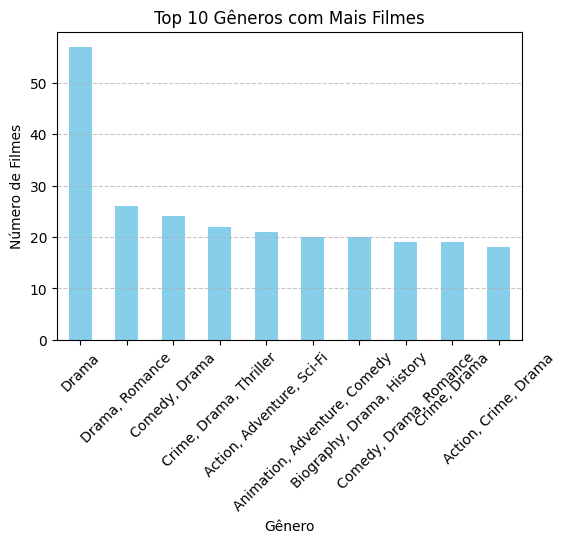

In [29]:
# Distribuição de filmes por genêro
top_films = df['Gênero'].value_counts().head(10)
plt.figure(figsize=(6,4))
top_films.plot(kind='bar', color='skyblue')
plt.title('Top 10 Gêneros com Mais Filmes')
plt.xlabel('Gênero')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

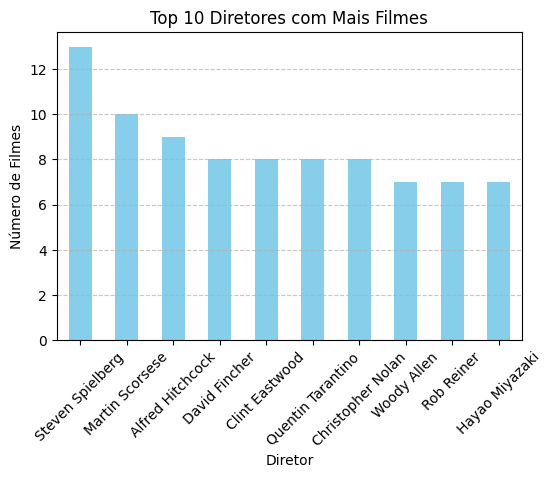

In [30]:
# Diretores com mais filmes
top_directors = df['Diretor'].value_counts().head(10)
plt.figure(figsize=(6,4))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Diretores com Mais Filmes')
plt.xlabel('Diretor')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

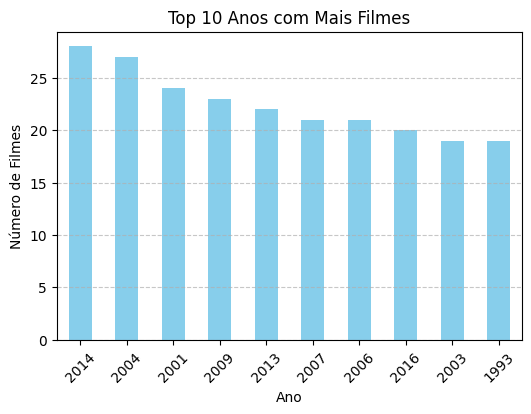

In [31]:
# Anos com mais filmes
top_anos = df['Ano_de_Lançamento'].value_counts().head(10)
plt.figure(figsize=(6,4))
top_anos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Anos com Mais Filmes')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

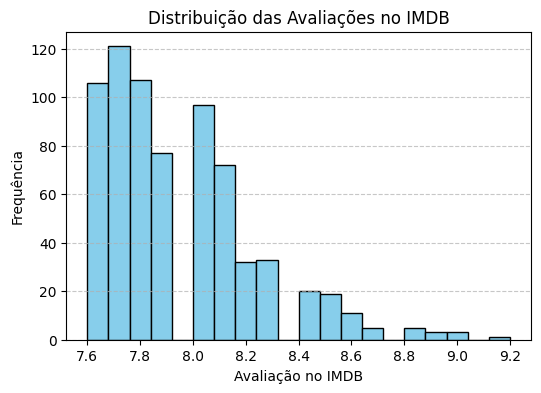

In [32]:
# Distribuição das avaliações no IMDB
plt.figure(figsize=(6,4))
plt.hist(df['Avaliação_IMDB'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribuição das Avaliações no IMDB')
plt.xlabel('Avaliação no IMDB')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

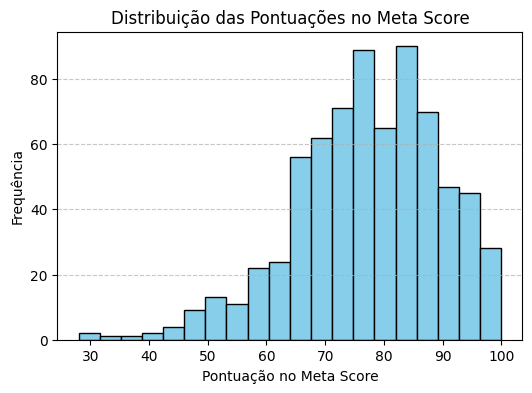

In [33]:
# Distribuição das pontuações no Metacritic
plt.figure(figsize=(6,4))
plt.hist(df['Meta_score'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribuição das Pontuações no Meta Score')
plt.xlabel('Pontuação no Meta Score')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

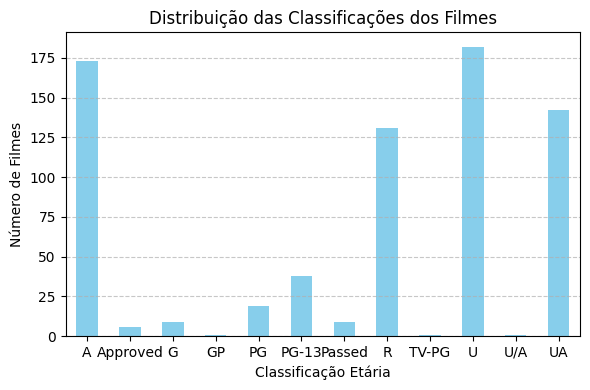

In [34]:
# Contagem de filmes por classificação
class_counts = df['Classificação'].value_counts()
# Ordenar as contagens por ordem alfabética das classificações
class_counts_sorted = class_counts.sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(6,4))
class_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Classificações dos Filmes')
plt.xlabel('Classificação Etária')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

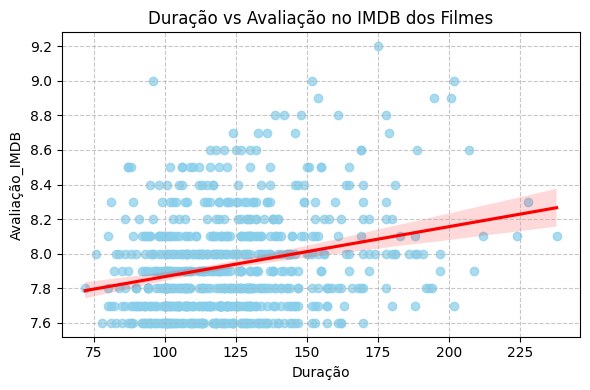

In [35]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(6,4))
plt.scatter(df['Duração'], df['Avaliação_IMDB'], color='skyblue', alpha=0.7)
plt.title('Duração vs Avaliação no IMDB dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Avaliação no IMDB')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
sns.regplot(data=df, x='Duração', y='Avaliação_IMDB', scatter=False, color='red')
plt.show()

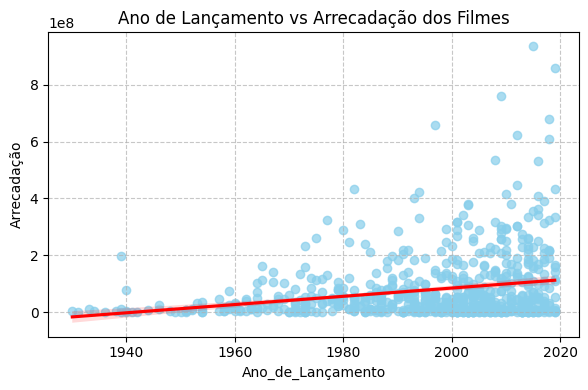

In [36]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(6,4))
plt.scatter(df['Ano_de_Lançamento'], df['Arrecadação'], color='skyblue', alpha=0.7)
plt.title('Ano de Lançamento vs Arrecadação dos Filmes')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Arrecadação')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
sns.regplot(data=df, x='Ano_de_Lançamento', y='Arrecadação', scatter=False, color='red')
plt.show()

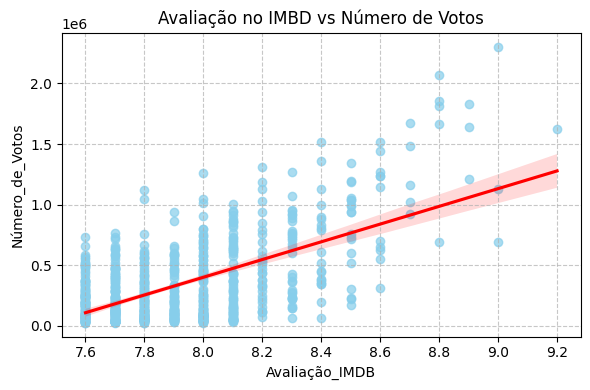

In [37]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(6,4))
plt.scatter(df['Avaliação_IMDB'], df['Número_de_Votos'], color='skyblue', alpha=0.7)
plt.title('Avaliação no IMBD vs Número de Votos')
plt.xlabel('Avaliação no IMDB')
plt.ylabel('N° de Votos (em milhões)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
sns.regplot(data=df, x='Avaliação_IMDB', y='Número_de_Votos', scatter=False, color='red')
plt.show()

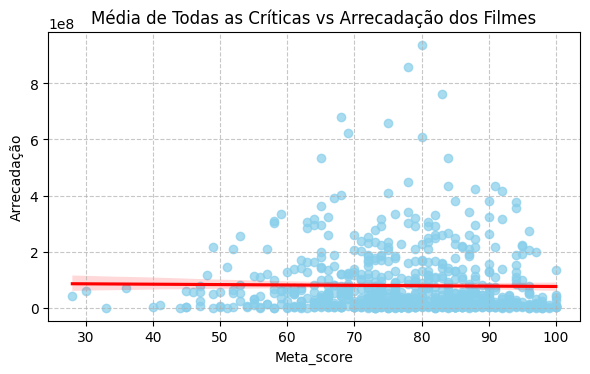

In [38]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(6,4))
plt.scatter(df['Meta_score'], df['Arrecadação'], color='skyblue', alpha=0.7)
plt.title('Média de Todas as Críticas vs Arrecadação dos Filmes')
plt.xlabel('Meta score')
plt.ylabel('Arrecadação (em milhões')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
sns.regplot(data=df, x='Meta_score', y='Arrecadação', scatter=False, color='red')
plt.show()

### **2. Responda também às seguintes perguntas:**
*Resposta no relatório*


#### **Qual filme você recomendaria para uma pessoa que você não conhece?**

In [39]:
filme_recomendado = df.loc[df['Avaliação_IMDB'].idxmax()]

print(f"Filme recomendado: {filme_recomendado['Título']} ({filme_recomendado['Ano_de_Lançamento']})")

Filme recomendado: The Godfather (1972)


In [40]:
filme_recomendado = df.loc[df['Meta_score'].idxmax()]

print(f"Filme recomendado: {filme_recomendado['Título']} ({filme_recomendado['Ano_de_Lançamento']})")

Filme recomendado: The Godfather (1972)


####**Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**

In [41]:
# Seleciona variaveis numericas
num_df = df.select_dtypes(include=['float64', 'int64'])
# Calcula a matriz de correlação
corr = num_df.corr()

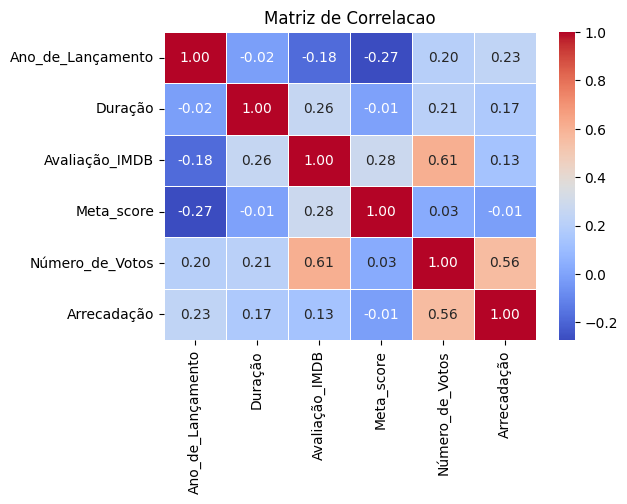

In [42]:
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

####  **Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

*Resposta no relatório*


### **3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**

*Resposta no relatório*

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [44]:
# Selecionando as variáveis relevantes
X = df[['Ano_de_Lançamento','Classificação','Duração', 'Gênero', 'Meta_score', 'Diretor', 'Estrela_1','Estrela_2', 'Estrela_3', 'Estrela_4', 'Número_de_Votos','Arrecadação']]
y = df['Avaliação_IMDB']

# Codificando variáveis categóricas (exemplo de codificação one-hot)
X = pd.get_dummies(X, columns=['Classificação','Gênero','Diretor', 'Estrela_1','Estrela_2', 'Estrela_3', 'Estrela_4',])

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error (MSE): 0.04
R^2 Score: 0.56


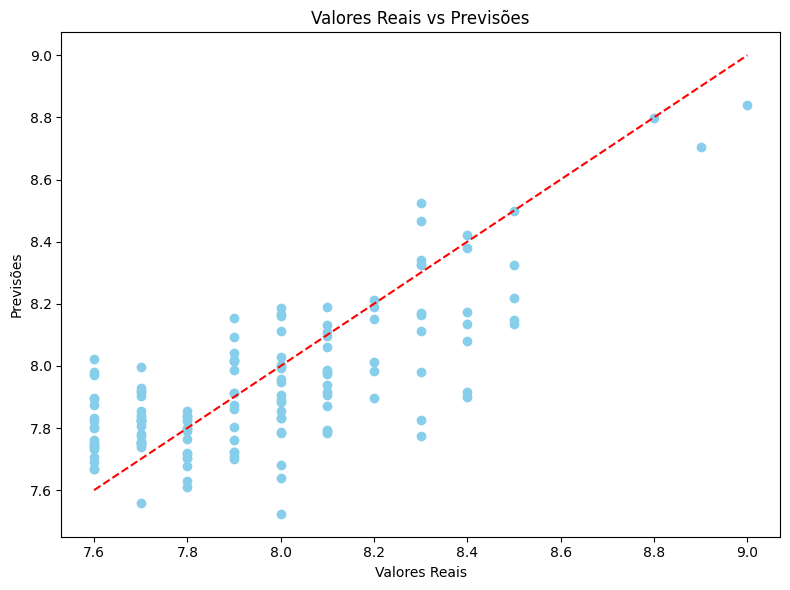

In [45]:
# Visualizar as previsões vs valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.tight_layout()
plt.show()

###**4. Supondo um filme com as seguintes características. Qual seria a nota do IMDB?**

```
{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
```



In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [47]:
novo_filme = {
    'Título': 'The Shawshank Redemption',
    'Ano_de_Lançamento': 1994,
    'Classificação': 'A',
    'Duração': 142,
    'Gênero': 'Drama',
    'Avaliação_IMDB': np.NaN,
    'Sinopse': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Diretor': 'Frank Darabont',
    'Estrela_1': 'Tim Robbins',
    'Estrela_2': 'Morgan Freeman',
    'Estrela_3': 'Bob Gunton',
    'Estrela_4': 'William Sadler',
    'Número_de_Votos': 2343110,
    'Arrecadação': 28341469
}


In [48]:
# Selecionando as variáveis relevantes para a previsão
X = df[['Ano_de_Lançamento', 'Meta_score', 'Arrecadação']]
y = df['Avaliação_IMDB']

# Dividindo os dados em conjunto de treino e teste
# Aqui você pode precisar ajustar se o modelo já estiver treinado
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Preparando os dados para previsão do novo filme
dados_previsao = [
    novo_filme['Ano_de_Lançamento'],
    novo_filme['Meta_score'],
    novo_filme['Arrecadação']
]

# Realizando a previsão com o modelo treinado
nota_IMDB_prevista = model.predict([dados_previsao])

print(f"A nota do IMDb prevista para o filme '{novo_filme['Título']}' é: {nota_IMDB_prevista[0]:.2f}")

A nota do IMDb prevista para o filme 'The Shawshank Redemption' é: 7.93


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **5.	Salve o modelo desenvolvido no formato .pkl.**

In [49]:
import joblib

# Salvar o modelo como arquivo .pkl
joblib.dump(model, 'modelo_imdb.pkl')

print("Modelo salvo com sucesso no arquivo 'modelo_imdb.pkl'.")

Modelo salvo com sucesso no arquivo 'modelo_imdb.pkl'.


In [50]:
# Carregar o modelo salvo do arquivo .pkl
loaded_model = joblib.load('modelo_imdb.pkl')

print(f"A nota do IMDb prevista para o filme '{novo_filme['Título']}' (usando o modelo carregado) é: {nota_IMDB_prevista[0]:.2f}")

A nota do IMDb prevista para o filme 'The Shawshank Redemption' (usando o modelo carregado) é: 7.93


###**Salvando Arquivo**

In [51]:
# Salvar o DataFrame como arquivo CSV
nome_arquivo = 'imdb_tratado.csv'
df.to_csv(nome_arquivo, index=False)  # index=False para não salvar o índice do DataFrame

In [52]:
from google.colab import files
files.download(nome_arquivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>